The sorting algorithms below were implemented by me in CSE331

#### The following imports must be made to run any code below

In [2]:
from typing import TypeVar, List, Callable, Dict
T = TypeVar("T")  # represents generic type
import timeit
from random import randint
import random
import matplotlib.pyplot as plt
from timeit import timeit
import numpy as np

### Merge Sort

In [3]:
def merge(d1, d2, data,
          comparator: Callable[[T, T], bool] = lambda x, y: x <= y) -> int:
    """
    :param d1: first half of the list
    :param d2: last half of the list
    :param data: the whole list
    :param comparator: How to sort the list
    return: the number of inversions
    """

    val = i = j = 0

    while i + j < len(data):

        if j == len(d2) or (i < len(d1) and comparator(d1[i], d2[j])):
            data[i + j] = d1[i]
            i += 1
            val += j
        else:
            data[i + j] = d2[j]
            j += 1
    return val

def merge_sort(data: List[T], threshold: int = 0,
               comparator: Callable[[T, T], bool] = lambda x, y: x <= y) -> int:
    """
    :param data: List of items to be sorted.
    :param threshold: int representing the size of the data at which insertion sort should be used.
    :param comparator: compares 2 variables and returns true if the first is larger else false
    return: int representing inversion count, else 0 if threshold > 0.
    """
    val = 0
    length = len(data)
    if length < 2:
        return 0

    if threshold > length:
        val = 0
        for i in range(1, length):
            j = i
            while (j > 0) and comparator(data[j], data[j - 1]):
                data[j], data[j - 1] = data[j - 1], data[j]
                j -= 1
                val += 1
        return val

    else:

        mid = length // 2
        data1 = data[0:mid]
        data2 = data[mid:length]
        val += merge_sort(data1, threshold, comparator)
        val += merge_sort(data2, threshold, comparator)

        val += merge(data1, data2, data, comparator)

    if threshold:
        return 0
    return val


### Insertion Sort

In [4]:
def insertion_sort(data: List[T],
                   comparator: Callable[[T, T], bool] = lambda x, y: x <= y) -> None:
    """
    :param data: unsorted list
    :param comparator: compares 2 variables and returns true if the first is larger else false
    return: int representing inversion count, else 0 if threshold > 0.
    """
    for i in range(1, len(data)):
        j = i
        while (j > 0) and comparator(data[j], data[j - 1]):
            data[j], data[j - 1] = data[j - 1], data[j]
            j -= 1

### Tim Sort

In [5]:
def tim_sort(data: List[T], threshold: int,
                comparator: Callable[[T, T], bool] = lambda x, y: x <= y) -> None:
    """
    :param data: List of items to be sorted.
    :param threshold: int representing the size of the data at which insertion sort should be used.
    :param comparator: compares 2 variables and returns true if the first is larger else false
    return: int representing inversion count, else 0 if threshold > 0.
    """
    merge_sort(data, threshold, comparator)
    return None

### Hypothesis

Looking at the data from the last question, we saw that merge sort became more efficient than insertion sort around a list size of 40 elements. My hypothesis is that Tim sort will be most efficient with a k value below 40, k < 40.

### Methods

To generate the sorting times I created lists with 100 randomized values from -100 to 100 using the random library with a constant seed. Using a seed will create the same randomized list across all testing instances. Tim sort is passed a the randomized list to sort and the run time was calculated using the python library timeit. There is only one time calculated for Tim sort per value k, but accuracy could be improved by averaging a number of trials per value of k. The values are then added to a list to be used for plotting.

### Code to Generate the Sorting Data

In [6]:
random.seed(331)

hybrid_times = []

for k in range(100):
    sample_list = [randint(-100,100) for i in range(100)]
    
    hybrid_list = sample_list[:]
    
    hybrid_times.append(
        timeit('tim_sort(hybrid_list, threshold=k)',
               number=1, globals=globals()))
    


### Code to plot the sorting times

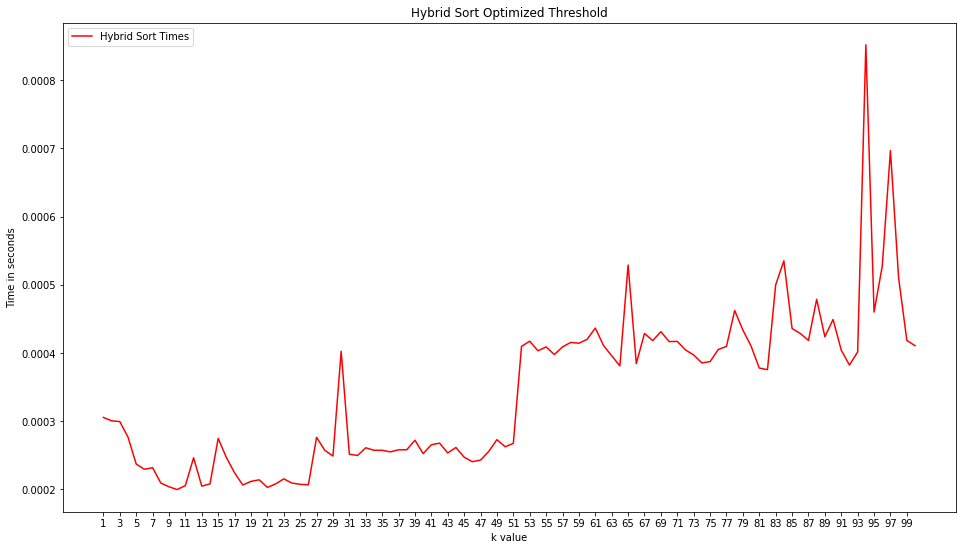

In [11]:
plt.plot([i+1 for i in range(len(hybrid_times))],
        hybrid_times,
        label="Hybrid Sort Times",
        color="red")

plt.legend()
plt.xticks(np.arange(1, 100+1, 2))
plt.title("Hybrid Sort Optimized Threshold")
plt.ylabel("Time in seconds")
plt.xlabel("k value")
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

### Results

Given the plot above, we observe that tim sort performs best with a k value under 51, which is higher than what was observed in the pervious question with merge sort being more efficient after a list length of 40. The y axis is the time the sorting algorithm took in seconds and the x axis shows the value of k. There are some instances of the algorithm taking more time than expected, which will be addressed in the discussion portion of the assignment.

### Discussion

I was surprised by the outcome, as the previous tests had shown that insertion sort is faster with a list size of under 40. This inscrease in run time could be explained by merge sort's recursive calls generating smaller and smaller lists which will, at a certain point, be sorted using insertion sort. There were several instances of the sorting alogorithm performing outside what was expected. I assume this could be caused by the generated list being close to or completely reversed. I didn't find any challenges when collecting this data.

### Conclusions

Under the conditions tested, tim sort produces a faster algorithm with k > 2 and k <= 51 while performing worse with a k value > 51.